In [15]:
import pandas as pd

In [17]:
# Baca dataset
data = pd.read_csv('cleaned_data_pmv.csv')
features = ["temperature", "humidity", "air_flow", "mrt"]
target = "pmv"

In [18]:
X = data[features]
y = data[target]

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
# Split 80% train dan 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifikasi ukuran masing-masing set
print(f"Train size: {len(X_train)/len(X):.2%}")
print(f"Test size: {len(X_test)/len(X):.2%}")


Train size: 80.00%
Test size: 20.00%


In [20]:
# Normalisasi
scaler = MinMaxScaler()

# Fit scaler hanya pada X_train, dan transform X_train, dan X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verifikasi ukuran masing-masing set setelah normalisasi
print(f"Train size: {len(X_train_scaled)/len(X):.2%}")
print(f"Test size: {len(X_test_scaled)/len(X):.2%}")

Train size: 80.00%
Test size: 20.00%


In [21]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error 


import numpy as np

print("=== Pelatihan Model XGBoost dengan Parameter Terbaik ===")

# Parameter terbaik hasil Grid Search Anda
best_xgb_params = {
    'colsample_bytree': 0.8,
    'gamma': 0,
    'learning_rate': 0.1,
    'max_depth': 7,
    'min_child_weight': 1,
    'n_estimators': 1000,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'subsample': 0.8,
    'random_state': 42
}

# Inisialisasi model XGBoostRegressor dengan parameter terbaik
best_xgb_model = xgb.XGBRegressor(**best_xgb_params)

# Melatih model
print("Melatih model XGBoost...")
best_xgb_model.fit(X_train_scaled, y_train)
print("Pelatihan selesai.")

# Melakukan prediksi pada data pengujian
y_pred_xgb = best_xgb_model.predict(X_test_scaled)

# Evaluasi model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f"[XGBoost Final Model] Mean Absolute Error (MAE) pada Data Uji: {mae_xgb:.4f}")



=== Pelatihan Model XGBoost dengan Parameter Terbaik ===
Melatih model XGBoost...
Pelatihan selesai.
[XGBoost Final Model] Mean Absolute Error (MAE) pada Data Uji: 0.0080


In [22]:
import joblib


In [23]:
joblib.dump(best_xgb_model, "model_pmv.pkl")
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [42]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=features)

In [43]:
import shap

# Inisialisasi TreeExplainer untuk XGBoost
explainer = shap.Explainer(best_xgb_model)

# Ambil SHAP values untuk data test
shap_values = explainer(X_test_scaled_df)


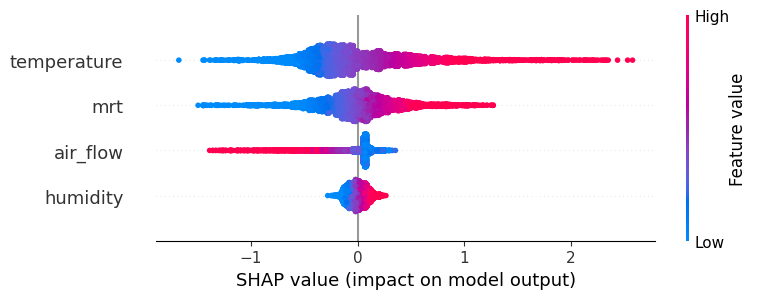

In [44]:
# Untuk summary plot
shap.summary_plot(shap_values, features=X_test_df, feature_names=features)


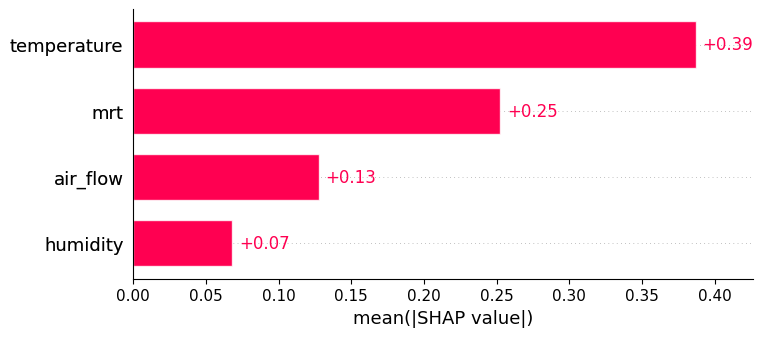

In [45]:
# Untuk bar plot
shap.plots.bar(shap_values, max_display=10)

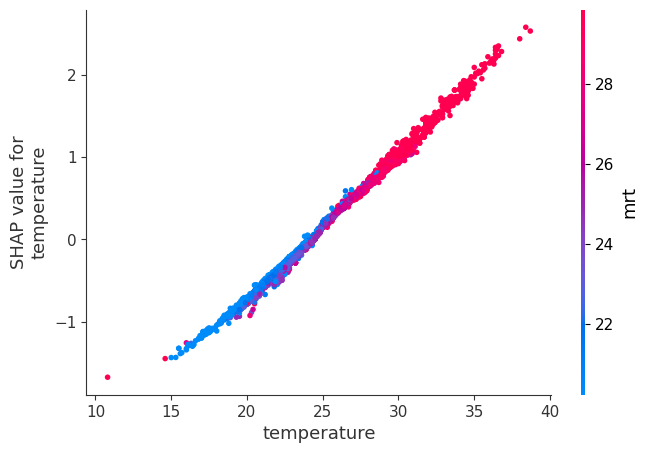

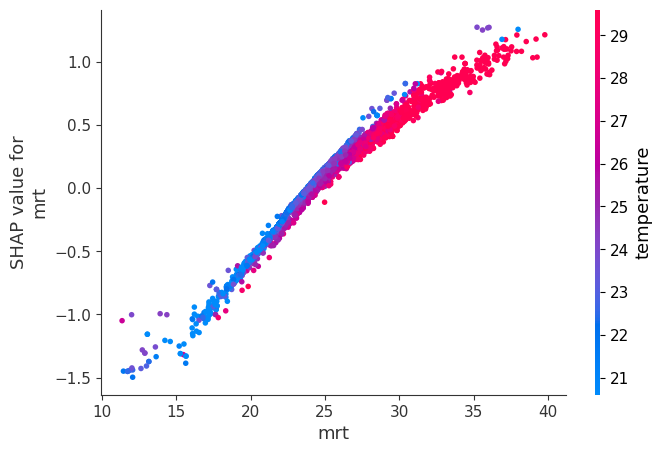

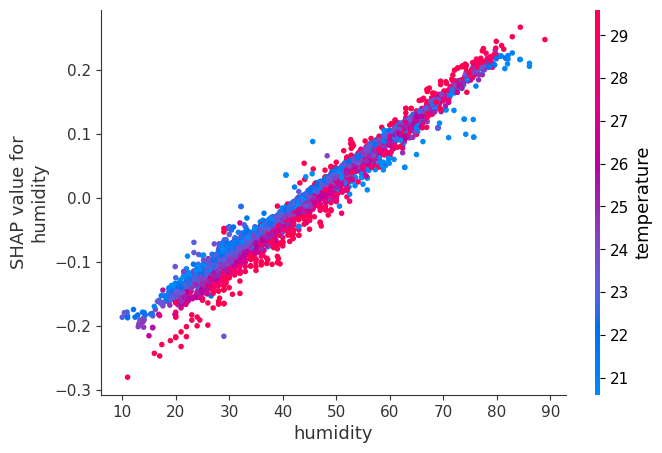

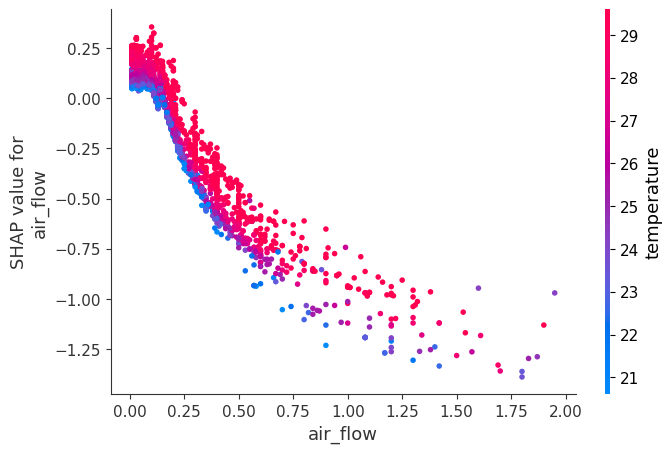

In [46]:
selected_features = ['temperature', 'mrt', 'humidity', 'air_flow']

for feature in selected_features:
    shap.dependence_plot(feature, shap_values.values, X_test, feature_names=features)
